In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
# 讀取 JSON 檔案
with open('./output_json/data_1205_1237.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 將 JSON 資料轉為 DataFrame
threads = pd.json_normalize(data["thread"])

# 將發佈時間轉換為可讀日期
threads["published_date"] = threads["published_on"].apply(
    lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')
)

# 顯示基本資訊
print(threads[["username", "published_date", "text", "like_count", "reply_count"]])

   username       published_date  \
0   ni_.888  2024-10-10 15:27:30   
1   ni_.888  2024-06-20 17:16:17   
2   ni_.888  2024-06-16 00:25:22   
3   ni_.888  2024-06-14 18:59:56   
4   ni_.888  2024-06-13 22:50:33   
5   ni_.888  2024-06-13 02:02:35   
6   ni_.888  2024-06-12 01:59:52   
7   ni_.888  2024-06-10 07:19:17   
8   ni_.888  2024-05-28 17:20:01   
9   ni_.888  2024-05-24 20:29:45   
10  ni_.888  2024-05-23 12:53:56   
11  ni_.888  2024-05-22 16:08:18   
12  ni_.888  2024-05-22 14:31:04   
13  ni_.888  2024-05-21 14:52:57   
14  ni_.888  2024-05-18 19:46:39   
15  ni_.888  2024-05-18 17:41:39   

                                                 text  like_count  reply_count  
0   一隻手機就能賺錢 不是詐騙不用會費\n自己做了快一年了 每個月都有穩定的收入\n代理歡迎私訊...           0            0  
1                                 超好出單 團隊已經破百人😆\n手機賺錢           1            0  
2   有人在找兼職工作的嗎！！\n一隻手機就能賺錢 只要你願意花時間認真\n沒有年齡限制、時間限制...           7            0  
3            文化幣使用期限至6/30不知道要花去哪\n可以找我換現金💰\n目前也有收代理唷🔥          

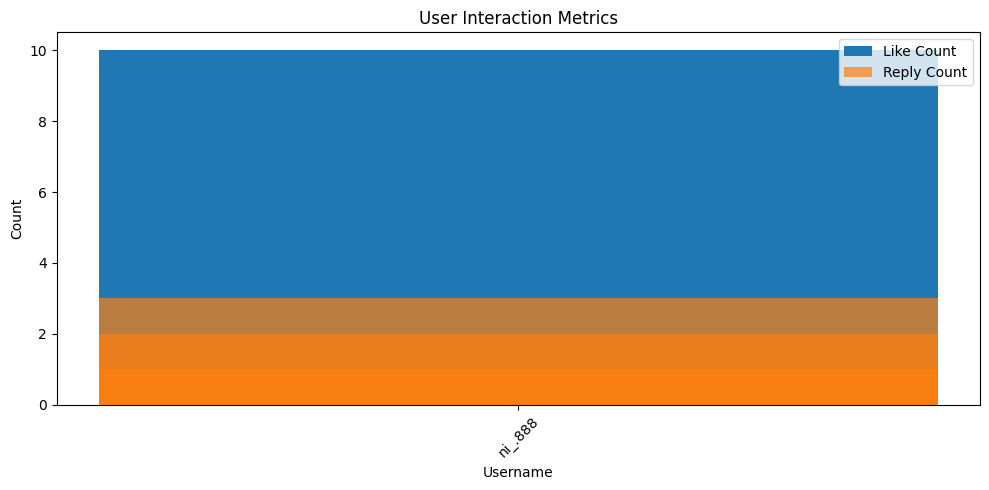

In [6]:
# 可視化互動數據 (讚數與回覆數)
plt.figure(figsize=(10, 5))
plt.bar(threads["username"], threads["like_count"], label="Like Count")
plt.bar(threads["username"], threads["reply_count"], label="Reply Count", alpha=0.7)
plt.title("User Interaction Metrics")
plt.xlabel("Username")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

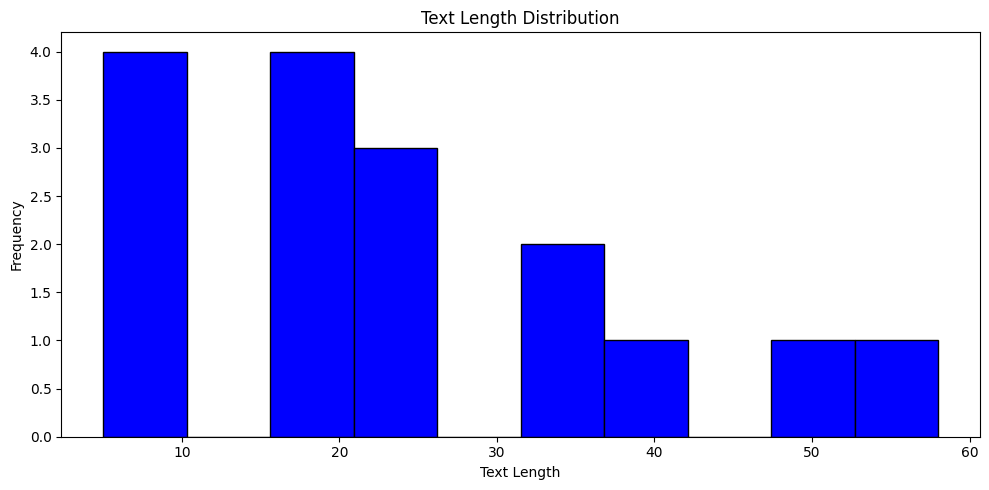

In [7]:
# 分析發文文字長度
threads["text_length"] = threads["text"].apply(len)

plt.figure(figsize=(10, 5))
plt.hist(threads["text_length"], bins=10, color="blue", edgecolor="black")
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()